<a href="https://colab.research.google.com/github/aileen696/modeling_infectious_diseases_SIR/blob/main/Runge_kutta4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo SIR estocástico

Para Resolver el modelo SIR estocastico lo resolveremos por el Algoritmo de Guillespie, para ello utilizaremos como vector de propensiones: 

v=[ beta* nS * ni/Omega , beta* nS* ni/Omega, gamma*ni]

Matriz estequiométrica:

S =[[-1.,0,0],[1,-1,0.],[0,1,]]

Cabe recalcar que la matriz estequiométrica y el vector de propensiones fue elegido en función del Modelo SIR, para cualquier otro caso tendría que modelarse diferente.

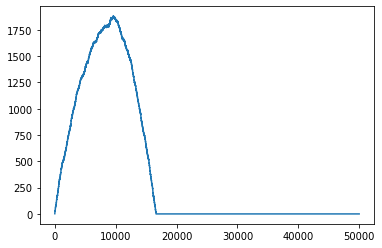

In [ ]:
#Se importan las librerias necesarias
import numpy as np #Para operaciones con vectores
import math # para funciones matematicas
import random as rnd #generacion de numeros aleatorios
import matplotlib.pyplot as plt #para graficar

#parametros
beta = 1.5
gamma = 0.7
Omega= 10000
Steps = 50000
#condiciones iniciales
t0=0.0
X0=Omega-1.
Y0=2.0
R0=0

#Se define la Matriz estoquiometrica vista en clase
S =[[-1.,0.,0.],[1.,-1.,0.],[0.,1.,0.]]
#Se inicializa los vectores solucion y el tiempo
Y = np.zeros([3,Steps+1])
t = np.zeros(Steps+1)
#Se inicializan las condiciones iniciales
Y[0][0]=X0
Y[1][0]=Y0
Y[2][0]=R0

#funcion que genera numero aleatorio de distribucion exponencial
def dist_exp(a):
	if(a>0.):
		r = rnd.random() #Se genera un numero aleatorio de distribucion uniforme
		return -(1./a)*math.log(r) #Se tranforma en distribucion exponencial
	else:
		quit()
		return 1
		

#Elige aleatoriamente la reaccion definida en el vector
# de propensiones ni y una tasa de reaccion global A
def dist_reaction(ni,A):
	r = rnd.random() #Numero aleatorio de distribucion uniforme
	if (A>0.):
		if (r < ni[0]/A): #Se elige reaccion 0
			return 0
		elif (r < (ni[0] + ni[1])/A): #Se elige reaccion 1
			return 1
	else:
		return 2

	
#ciclo del algoritmo
for i in range(Steps):
    
    ni = np.array([beta*Y[0][i]*Y[1][i]/Omega, gamma*Y[1][i]])
    a=sum(ni)
    tau=dist_exp(a)
    mu=dist_reaction(ni,a)
    Y[0][i+1]=Y[0][i] + S[0][mu]
    Y[1][i+1]=Y[1][i] + S[1][mu]
    Y[2][i+1]=Y[2][i] + S[2][mu]
    t[i+1]= t[i]+tau
    
    

#se grafica el espacio fase
plt.plot(Y[1])
#Se grafica la evolucion en el tiempo
plt.show()

# **Solución al Modelo SIR determinista**

Se dará solución al modelo SIR poblacional con el Metodo Runge-Kutta 4 utilizando los siguientes parámetros:

dS/dt = - (𝛽 S I) / 𝑁
dI/dt= (𝛽 S I) /𝑁 - 𝛾 I

dR/dt= 𝛾 I

con los siguientes parámetros:

𝑁: Population size          [10.000 , 1.000.000]

𝛾:  Effective recovery rate            0.7

𝛽:  Effective infection rate           [1.5 , 2.5]

We define the initial condition in each patch as follows: 𝑆𝑖(0) = 𝑁𝑖

𝐼𝑖(0) = 0,

𝑅𝑖(0) = 0 for 𝑖 = 2, …, 𝑛

𝑆1(0) = 𝑁1 − 1,

𝐼1(0) = 1,

𝑅1(0) = 0.




In [ ]:


def MetodoRungeKutta4Sistema(a, b, n, y0List, fList, yList = None, verbose = False, complete = False):
  

    m = len(fList)
    if (verbose):
        print("El sistema tiene {} ecuaciones".format(m), end = "\n\n")

    h = (b - a) / n  
    if (verbose):  
        print("h =", h, end = "\n\n")

    t = np.zeros(n + 1) # Ponemos n + 1 porque también incluimos el índice 0, array del tiempo
    t[0] = a  #tiempo inicial es igual a la condición inicial
    

    yHat = np.zeros((m, n + 1)) #array con m filas y n+1 columnas
    yHat[:, 0] = np.array( y0List) # La primera columna de la matriz de aproximaciones vale la condición iniciales
        

    k = np.zeros((m , 4))  #k del método Runge-Kutta
    for i in range(1, n + 1):
        for j in range(m):
            k[j, 0] = fList[j](t[i - 1], yHat[:, i - 1])
        for j in range(m):
            k[j, 1] = fList[j](t[i - 1] + h / 2, yHat[:, i - 1] + (h * k[:, 0] / 2))
        for j in range(m):
            k[j, 2] = fList[j](t[i - 1] + h / 2, yHat[:, i - 1] + (h * k[:, 1] / 2))
        for j in range(m):
            k[j, 3] = fList[j](t[i - 1] + h, yHat[:, i - 1] + (h * k[:, 2]))
        for j in range(m):
            yHat[j, i] = yHat[j, i - 1] + h / 6 * (k[j, 0] + 2 * k[j, 1] +
                                                   2 * k[j, 2] + k[j, 3])

        t[i] = a + i * h  # el tiempo se actualiza con el tamaño de paso
         
        #if verbose:    **para ver los K**
            #for i in range(4):
                #for j in range(m):
                    #print("k({}, {}) = {}".format(j, i, k[j, i]), end = "\t")
                #print("")
            #print("\n\n" + "=" * 75, end = "\n\n")
    
    data = pd.DataFrame({"t": t})
    for col in range(m):
        data["yHat" + str(col + 1)] = yHat[col, : ]
    
    if verbose:
        print(data)
        fig = plt.figure(facecolor='w')
        ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
        ax.plot(data["t"], data["yHat1"], 'b', alpha=0.5, lw=2, label='Susceptibles')
        ax.plot(data["t"], data["yHat2"], 'r', alpha=0.5, lw=2, label='Infectados')
        ax.plot(data["t"], data["yHat3"], 'g', alpha=0.5, lw=2, label='Recuperados')
        ax.set_xlabel('time')
        ax.set_ylabel('people')
        #ax.set_ylim(0,(I0+R0+S0))
        ax.yaxis.set_tick_params(length=0)
        ax.xaxis.set_tick_params(length=0)
        ax.grid(b=True, which='major', c='w', lw=2, ls='-')
        legend = ax.legend()
        legend.get_frame().set_alpha(0.5)
        for spine in ('top', 'right', 'bottom', 'left'):
          ax.spines[spine].set_visible(False)
        plt.show()

  
    
    if complete:
        return data
    return yHat

    

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


N=10000
gam=0.7
bet=1.5

a = 0
b = 100
n = 1000 # De este modo conseguimos h = 0.1
y0 = np.array([N-1,1,0])

def f1(t, x):
    return  (-bet*x[0] * x[1])/N 

def f2(t, x): 
    return (bet*x[0] * x[1])/N - gam*x[1]

def f3(t,x):
    return  gam*x[1]

#soluciones analíticas

def y1(t):
    return 0

def y2(t):
    return 0

El sistema tiene 3 ecuaciones

h = 0.1

          t        yHat1         yHat2        yHat3
0       0.0  9999.000000  1.000000e+00     0.000000
1       0.1  9998.843855  1.083270e+00     0.072876
2       0.2  9998.674711  1.173470e+00     0.151819
3       0.3  9998.491486  1.271178e+00     0.237336
4       0.4  9998.293009  1.377017e+00     0.329974
...     ...          ...           ...          ...
996    99.6  1682.191889  3.636081e-14  8317.808111
997    99.7  1682.191889  3.476894e-14  8317.808111
998    99.8  1682.191889  3.324676e-14  8317.808111
999    99.9  1682.191889  3.179123e-14  8317.808111
1000  100.0  1682.191889  3.039941e-14  8317.808111

[1001 rows x 4 columns]


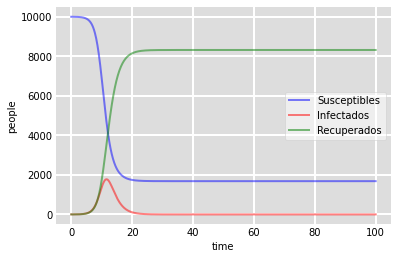

In [ ]:
yHat = MetodoRungeKutta4Sistema(a, b, n, y0, [f1, f2,f3], yList =None, verbose = True)

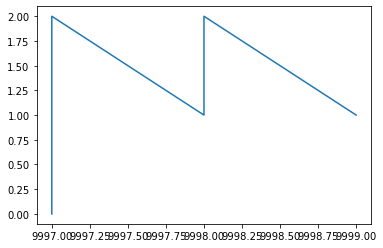

In [ ]:
#Se importan las librerias necesarias
import numpy as np #Para operaciones con vectores
import math # para funciones matematicas
import random as rnd #generacion de numeros aleatorios
import matplotlib.pyplot as plt #para graficar

#parametros
beta = 1.5
gamma = 0.7
Omega= 10000
Steps = 500000
#condiciones iniciales
t0=0.0
X0=Omega-1.
Y0=1.0
R0=0

#Se define la Matriz estoquiometrica vista en clase
S =[[-1.,0.,0.],[1.,-1.,0.],[0.,1.,0.]]
#Se inicializa los vectores solucion y el tiempo
Y = np.zeros([3,Steps+1])
t = np.zeros(Steps+1)
#Se inicializan las condiciones iniciales
Y[0][0]=X0
Y[1][0]=Y0
Y[2][0]=R0

#funcion que genera numero aleatorio de distribucion exponencial
#def dist_exp(a):
#	if(a>0.):
#		r = rnd.random() #Se genera un numero aleatorio de distribucion uniforme
#		return -(1./a)*math.log(r) #Se tranforma en distribucion exponencial


def dist_exp(a):
  if(a>0):
    r= rnd.random()
    return -(1/a)*math.log(r)
  else:
    a=1
    return a

#Elige aleatoriamente la reaccion definida en el vector
# de propensiones ni y una tasa de reaccion global A
def dist_reaction(ni,A):
	r = rnd.random() #Numero aleatorio de distribucion uniforme
	if (A>0.):
		if (r < ni[0]/A): #Se elige reaccion 0
			return 0
		elif (r < (ni[0] + ni[1])/A): #Se elige reaccion 1
			return 1
	else:
		return 2

	
#ciclo del algoritmo
for i in range(Steps):
    
    ni = np.array([beta*Y[0][i]*Y[1][i]/Omega, gamma*Y[1][i]])
    a=sum(ni)
    tau=dist_exp(a)
    mu=dist_reaction(ni,a)
    Y[0][i+1]=Y[0][i] + S[0][mu]
    Y[1][i+1]=Y[1][i] + S[1][mu]
    Y[2][i+1]=Y[2][i] + S[2][mu]
    t[i+1]= t[i]+tau
    
    

#se grafica el espacio fase
plt.plot(Y[0],Y[1])
#Se grafica la evolucion en el tiempo
plt.show()